## Making 2D KDE plots of spot temp vs. filling factor

N. Gosnell July 5, 2018

We might wants plots of spot temp vs. filling factor for the Cool Stars talk and/or the paper. Let's give this a try...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Copying and pasting the same commands over and over is annoying. So let's set a function to do it for us

In [33]:
def setupkde(order,run,burn):
    ws = np.load('../sf/m'+str(order)+'/output/mix_emcee/run0'+str(run)+'/emcee_chain.npy')
    burned = ws[:, burn:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])
    burnedT2 = ws[:, burn:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    return f_omega, T2

Order 109 looks interesting based on the batch emcee results, so let's start there.

In [2]:
ws = np.load("../sf/m109/output/mix_emcee/run01/emcee_chain.npy")

In [3]:
burned = ws[:, 2500:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])

/Users/ngosnell/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


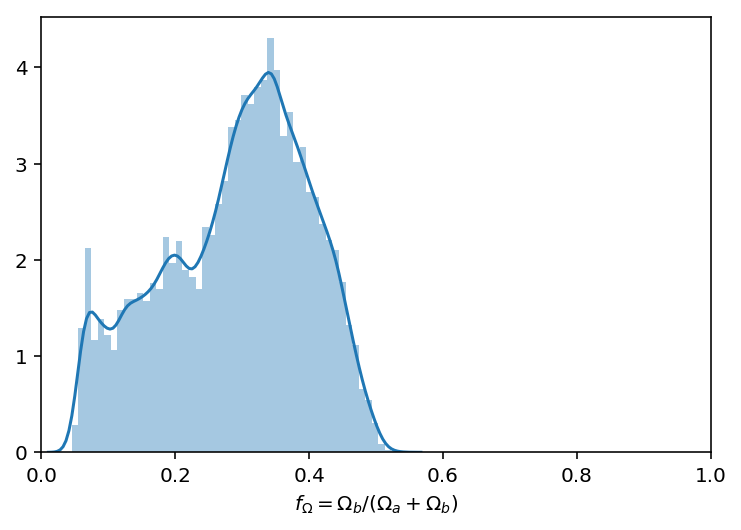

In [5]:
sns.distplot(f_omega)
plt.xlabel('$f_{\Omega} = \Omega_b/(\Omega_a + \Omega_b)$')
plt.xlim(0, 1);

Text(0,0.5,'$T_{\\mathrm{eff, 2}}$')

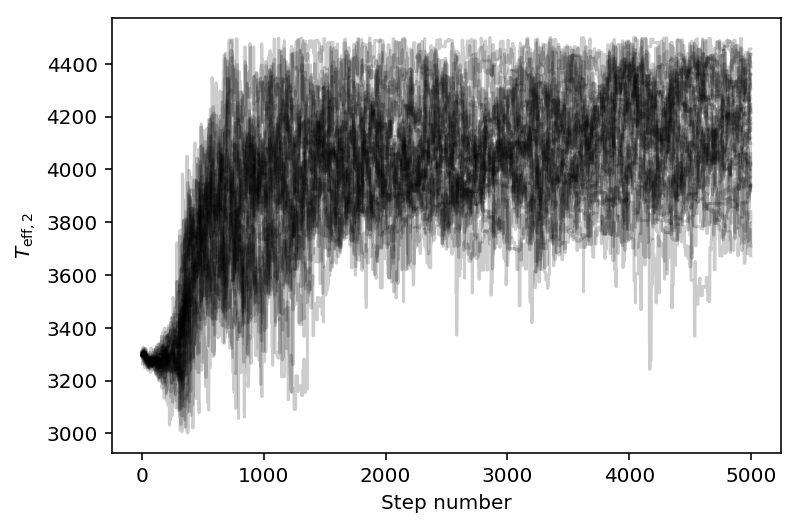

In [6]:
plt.plot(ws[:, :, 6].T, color="k", alpha=0.2)
plt.xlabel("Step number")
plt.ylabel("$T_{\mathrm{eff, 2}}$")

We only want the last 2500 steps of $T_{\mathrm{eff, 2}}$ to compare against the burned-in filling factor.

In [7]:
burnedT2 = ws[:, 2500:, 6] 
burnedT2.shape
Txs, Tys = burnedT2.shape
T2 = burnedT2.reshape(Txs*Tys)
T2.shape

(100000,)

In [8]:
f_omega.shape

(100000,)

Warning, the next cell takes awhile to run...

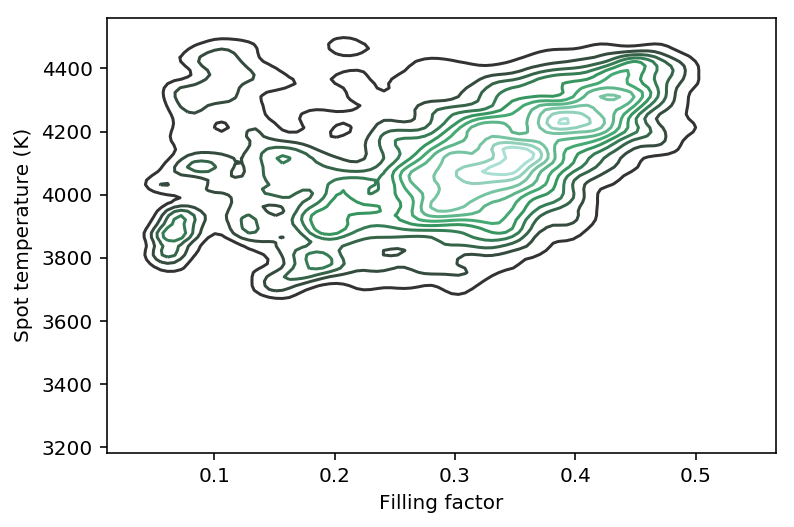

In [9]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

Cool!

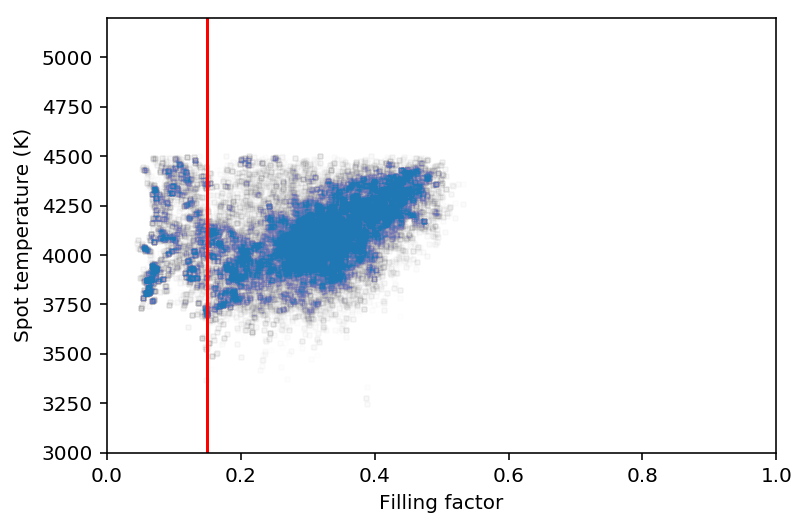

In [22]:
plt.plot(f_omega, T2, '.', alpha=0.005)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)")
plt.axvline(0.15, color='r')
plt.xlim(0,1)
plt.ylim(3000,5200);

### Let's look at order 116...

In [50]:
f_omega, T2 = setupkde(116,1,2500)

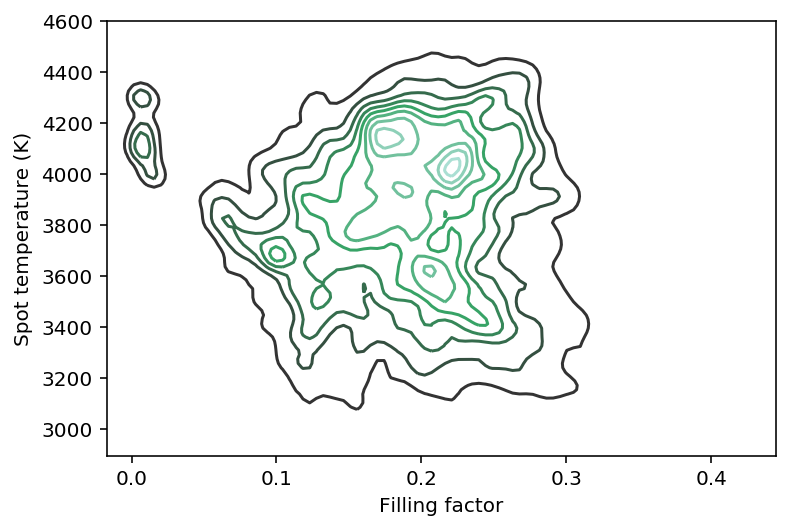

In [51]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Order 119

In [39]:
f_omega, T2 = setupkde(119,1,2500)

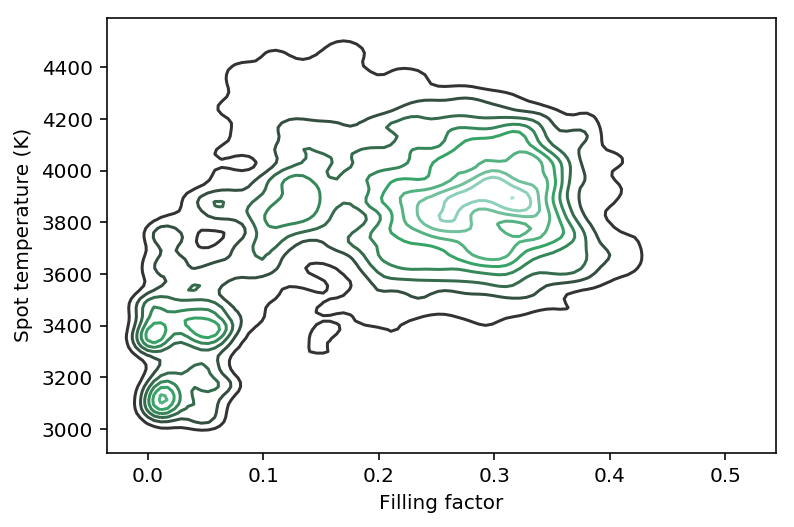

In [40]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Order 106

In [35]:
f_omega, T2 = setupkde(106,1,2500)

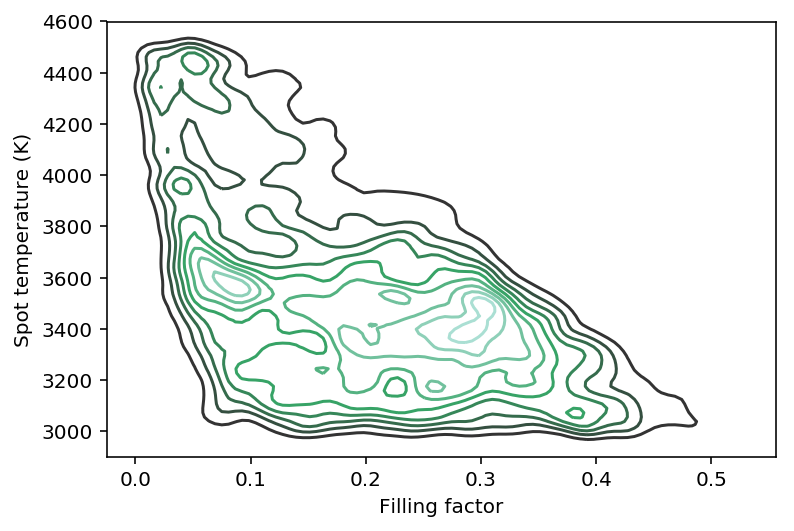

In [36]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Order 107, run02

In [53]:
f_omega, T2 = setupkde(107,2,3000)

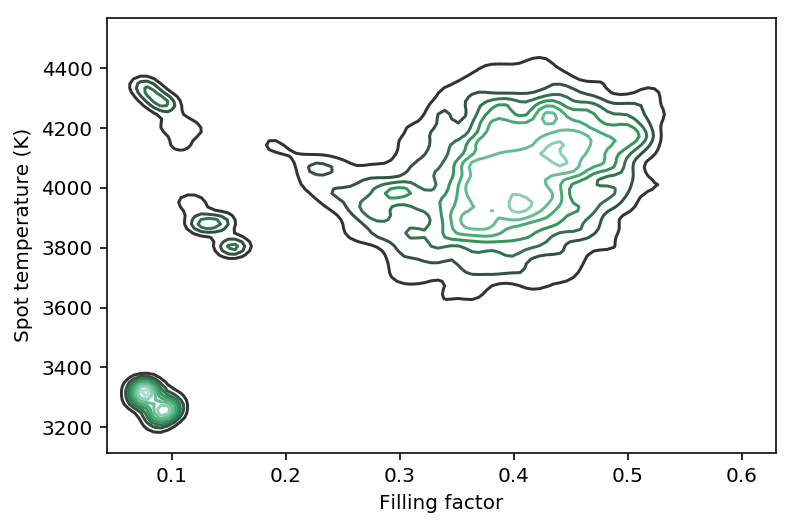

In [54]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Order 110, run02

In [55]:
f_omega, T2 = setupkde(110,2,3000)

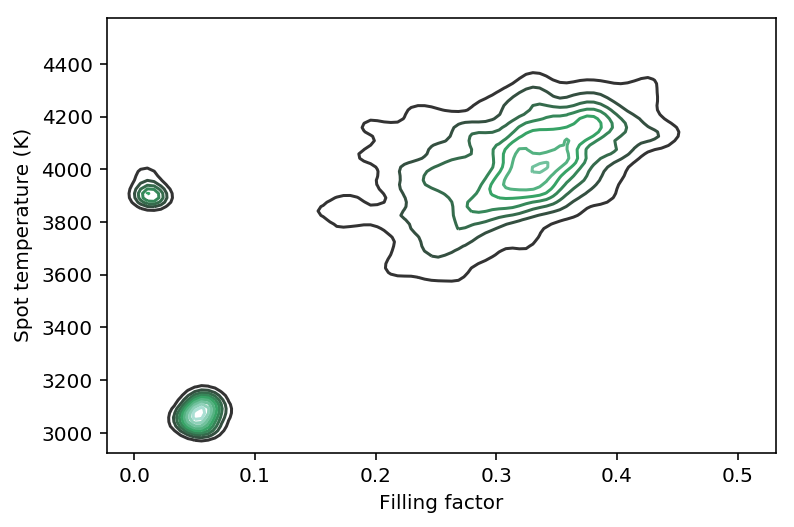

In [56]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Order 113, run02

In [57]:
f_omega, T2 = setupkde(113,2,3000)

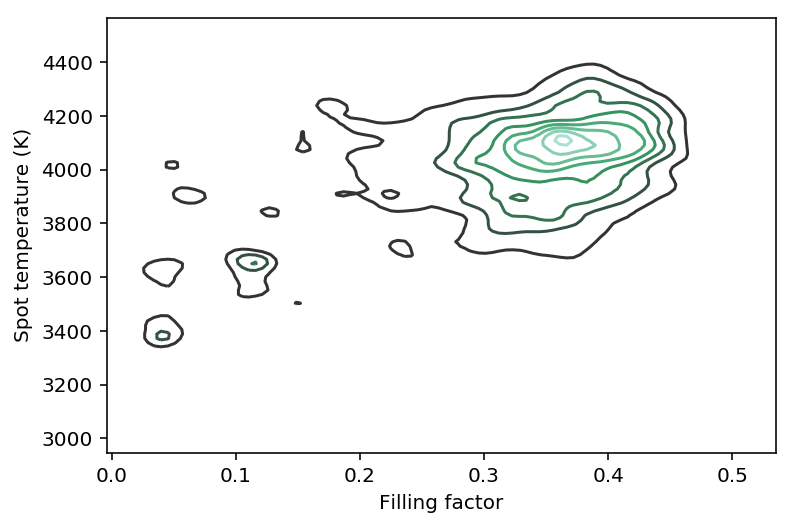

In [58]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Order 114, run02

In [59]:
f_omega, T2 = setupkde(114,2,3000)

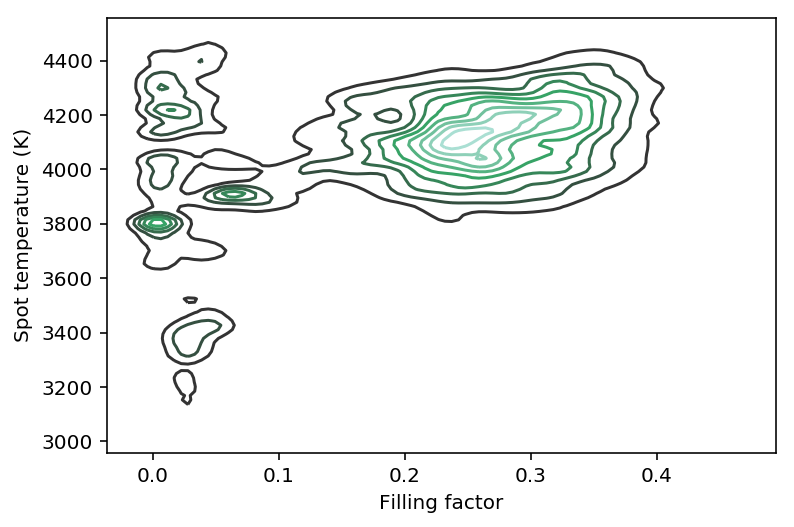

In [60]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Order 118, run02

In [61]:
f_omega, T2 = setupkde(118,2,2500)

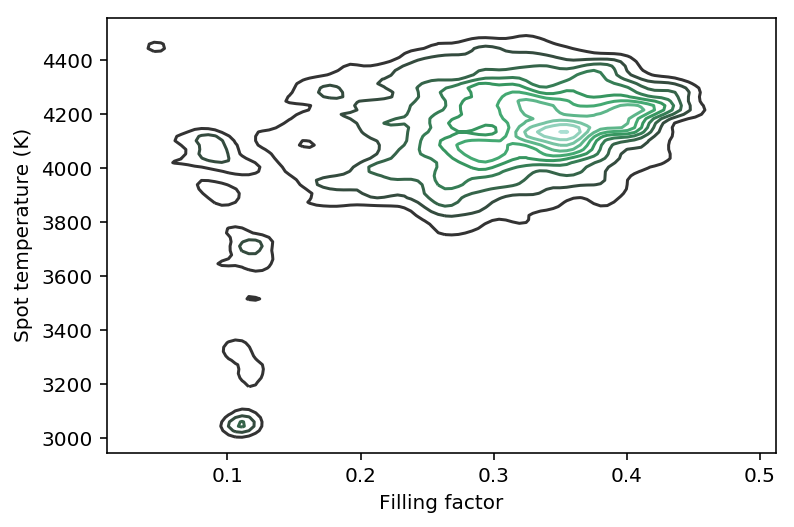

In [62]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

### Combining orders?

What would it look like if we take, say, the last 500 samples from all the good orders. Not sure if this is legit, but let's try anyway.

In [79]:
goodorders1 = [106, 109, 116, 119]
goodorders2 = [107, 110, 113, 114, 118]

burn = 100

f_omega_all = []
T2_all = []

for i in range(len(goodorders1)):
    ws = np.load('../sf/m'+str(goodorders1[i])+'/output/mix_emcee/run01/emcee_chain.npy')
    burned = ws[:, burn:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])
    f_omega_all.append(f_omega)
    burnedT2 = ws[:, burn:, 6]
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    T2_all.append(T2)

for j in range(len(goodorders2)):
    ws = np.load('../sf/m'+str(goodorders2[j])+'/output/mix_emcee/run02/emcee_chain.npy')
    burned = ws[:, burn:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])
    f_omega_all.append(f_omega)
    burnedT2 = ws[:, burn:, 6]
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    T2_all.append(T2)
    
T2_all = np.asarray(T2_all)
allx, ally = T2_all.shape
T2_all = np.reshape(T2_all, allx*ally)
f_omega_all = np.asarray(f_omega_all)
f_omega_all = np.reshape(f_omega_all, allx*ally)

In [76]:
f_omega_all.shape

(1620000,)

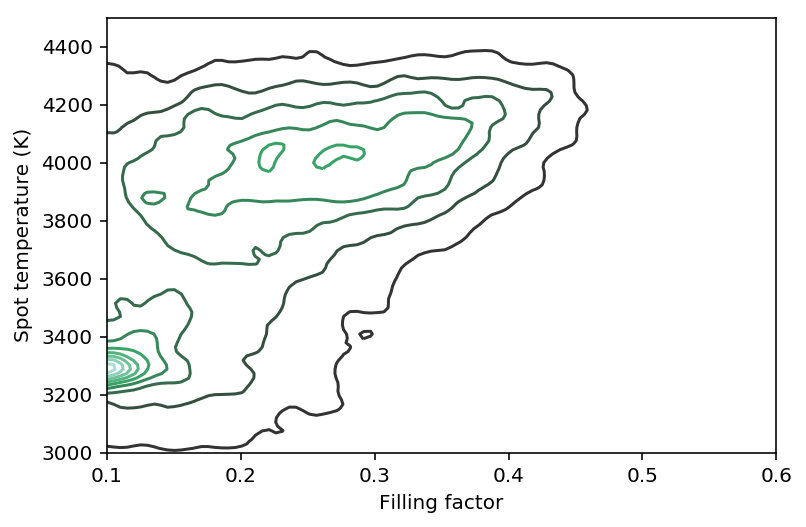

In [86]:
sns.kdeplot(f_omega_all, T2_all, clip=((0.1,0.6),(3000,4500)))
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)")
plt.savefig('../results/figs/spottemp_fillfactor_kde_allorders.png', dpi=300, bbox_inches='tight');

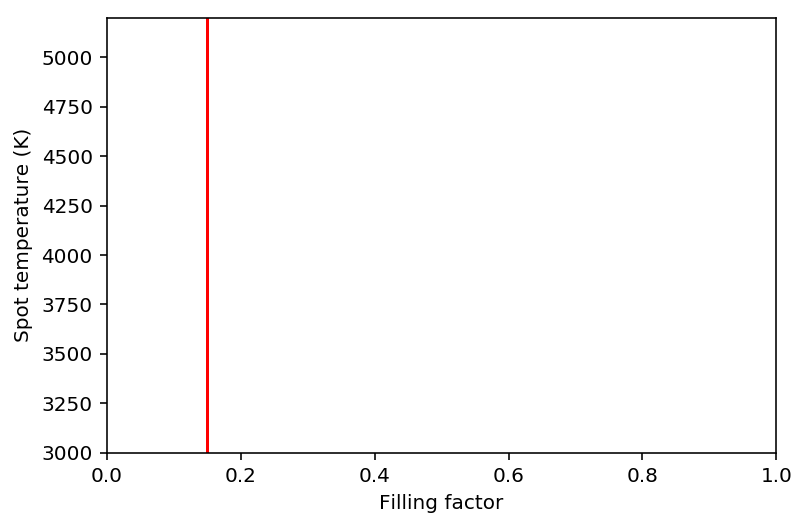